# ECS7024P Coursework 2

##  1. Introduction

### 1.1 The Dataset

The original data comes from the [National Bridge Inspection](https://www.fhwa.dot.gov/bridge/nbi/ascii.cfm) section of the FHWA's web site. However, this dataset has been greatly simplified.

**The aim of the Bridge Inspection programme is to check on the state of bridges so that necessary repairs can be carried out. If this is not done, a bridge can fail. The dataset has information about the bridges and the condition given in the most recent inspection.**

* The FHWA's database covers the whole USA, but this dataset focuses exclusively on Texas. 
* While the FHWA dataset also includes tunnels and culverts, the Texas data used here includes only bridges. Culverts (drains under highways) have been removed..
* All of the bridges carry a highway, but what lies underneath (another road, waterway, or railway) varies.


### 1.2 The Variables

The original FHWA dataset has over 100 variables (Texas collects even more). This version have been simplifies to include both continuous and categorical variables. 


| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Structure_id   | Unique identifier of the bridge                  | String |
|District       | Highway district in Texas responsible for bridge | category | 
|Detour_Km      | Length of detour if bridge closed                | continuous |
|Toll           | Whether a toll is paid to use bridge             | category |
|Maintainer     | The authority responsible for maintenance        | category |
|Urban          | Whether the bridge is located in an urban or rural area   | category |
|Status         | The road class: interstate to local                       | category | 
|Year           | The year the bridge was built                             | continuous | 
|Lanes_on       | The number of lanes that run over the bridge              | continuous (or discrete) |
|Lanes_under    | The number of lanes that run under the bridge             | continuous (or discrete) |
|AverageDaily   | The average daily traffic (number of vehicles)            | continuous |
|Future_traffic | The estimated daily traffic in approx 20 years time       | continuous |
|Trucks_percent | The percent of traffic made up of 'trucks' (i.e. lorries) | continuous |
|Historic       | Whether the bridge is historic                            | category | 
|Service_under  | The (most important) service that runs under the bridge   | category |
|Material       | The dominant material the bridge is made from             | category |
|Design         | The design of the bridge                                  | category |
|Spans          | The number of spans the bridge has                        | category (or discrete) |
|Length         | The length of the bridge in metres                        | continuous |
|Width          | The width of the bridge in metres                         | continuous |
|Rated_load     | The rated max loading of bridge (in tonnes)               | continuous |
|Scour_rating   | Only for bridges over water: the 'scour' condition        | ordinal |
|Deck_rating    | The condition of the deck of the bridge                   | ordinal |
|Superstr_rating| The condition of the bridge superstructure                | ordinal |
|Substr_rating  | The condition of the bridge substructure (foundations)    | ordinal |

**Note on 'scour'**: For bridges over water, the flow can erode or weaken the bridge supports (piers). This process, called "scouring", is measured by the `Scour_rating`.

 
**Values of Categorical Variables** In the original data, the values of the categorical variables are represented as integers, with their meanings given in a data dictionary. In this dataset, these 'numeric codes' have been replaced with suitable names.

| Variable      |      Values            |
|:--------------|:-----------------------|
|District       | Each district has a unique number  |
|Toll           | Toll, Free                |
|Maintainer     | State, County, Town or City, Agency, Private, Railroad, Toll Authority, Military, Unknown |
|Urban          | Urban, Rural |
|Status         | Interstate, Arterial, Minor, Local |
|Historic       | Register, Possible, Unknown, Not historic |
|Service_under  | Other, Highway, Railroad, Pedestrian, Interchange, Building |
|Material       | Other, Concrete, Steel, Timber, Masonry |
|Design         | Other, Slab, Beam, Frame, Truss, Arch, Suspension, Movable, Tunnel, Culvert, Mixed |
|Scour_rating   | Unknown, Critical, Unstable, Stable, Protected, Dry, No waterway |
|Deck_rating    | *Rating*: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |
|Superstr_rating| *Rating* |
|Substr_rating  | *Rating* |


### 1.3 Scenario

The Texas Department of Transportation aims to investigate how well specific variables can predict the current condition of bridges. The following variables are of interest: 

1. **Age** (derived from the `Year` variable)
2. **Average Daily Traffic** (`AverageDaily`)
3. **Percentage of Trucks** (`Trucks_percent`)
4. **Material** (`Material`)
5. **Design** (`Design`)

The current condition of bridges is derived from three variables `Deck_rating`, `Superstr_rating` and `Substr_rating` of the bridges. 
The department wishes to answer following questions:

1. How well can these variables predict the current condition of bridges?
2. Which variables have the greatest influence on the current condition?

The use of regression has been agreed in advance. 


### 1.4 Loading the Data

A 'type map' is used to set the appropriate data types for each variable. Non-numeric fields are represented as categorical variables: using type `category` gives the default behaviour (use each unique value as a category and categories are not ordered). However, for the ordinal variables (such as Ratings) must be declared with a suitable type explicitly.   


**Note**: The Introduction markdown is adapted and modified from Notebook3 provided by Dr.William Marsh

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

In [151]:
# The code below declares a catageorical type with categories in a specified order
# This can be used for an ordinal variable
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)

# This one is also for an ordinal variable, but with a slightly different set of values
scour_type = pd.CategoricalDtype(
    categories=['Unknown', 'Critical','Unstable', 'Stable', 'Protected', 'Dry', 'No waterway'], 
    ordered=True)

types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type, 
              'Scour_rating':scour_type}

bridges = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict, index_col = 'Structure_id')
bridges  

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


##  2. Requirements

### 2.1: Data Preparation
In this section, the dataset is prepared by deriving new variables, simplifying categories, and addressing any outliers. The following steps are required for data preparation.

#### **2.1.1 Deriving Age Variable**
As the dataset does not have an `Age` variable, it will derived from the `Year` variable. The `Age` of a bridge is calculated by substracting the year it was built from this year (2024).

Bridges classified as historic and those older than 100 years, are excluded as shown below.

In [152]:
this_year = 2024
bridges['Age'] = this_year - bridges['Year']

bridges_filtered_age = bridges[(bridges['Historic'].isin(['Not historic', 'Possible', 'Unknown'])) & (bridges['Age'] <= 100)]
bridges_filtered_age[['Historic', 'Age']].head()

,Historic,Age
Structure_id,,
000021521-00101,Not historic,19
000021521-00181,Not historic,19
000021521-TMP20,Not historic,12
000021525-00012,Not historic,74
000021580-00092,Not historic,20


#### **2.1.2 Simplifying Categories in Material and Design**

To reduce the number of categories in the `Material` and `Design` variables, very small categories were merged into broader groups. For example:
- **Material**: Categories like `Masonry` and `Other` were merged into an **"Others"** category.

- **Design**: Categories such as `Movable`, `Suspension`, `Frame` and `Other` were merged into an **"Others"** category .

In [153]:
#First check distribution of Material and Design 
material_distr = bridges_filtered_age['Material'].value_counts()
design_distr = bridges_filtered_age['Design'].value_counts()

material_distr, design_distr

(Material
 Concrete    26764
 Steel        6400
 Timber        464
 Other          47
 Masonry         5
 Name: count, dtype: int64,
 Design
 Beam          28072
 Slab           4181
 Other          1237
 Arch            111
 Frame            52
 Truss            16
 Movable           8
 Suspension        3
 Name: count, dtype: int64)

In [154]:
# Variable 1: Material
# Define new ordinal type for the simplified material
simp_material_type = pd.CategoricalDtype(categories=['Concrete','Steel','Timber','Others'])

#Create new dictionary mapping existing to new values 
simp_material_dict={'Concrete':'Concrete', 'Steel':'Steel', 'Timber':'Timber', 
                    'Other':'Others', 'Masonry':'Others'}

def simpMaterial(row):
    if row.Material in simp_material_dict:
        return simp_material_dict[row.Material]
    return row.Material

bridges_filtered_age = bridges_filtered_age.assign(SimpMat = bridges_filtered_age.apply(simpMaterial, axis=1))
bridges_filtered_age = bridges_filtered_age.astype({'SimpMat':simp_material_type})

bridges_filtered_age.loc[:,['Material', 'SimpMat']].head()

,Material,SimpMat
Structure_id,,
000021521-00101,Concrete,Concrete
000021521-00181,Concrete,Concrete
000021521-TMP20,Concrete,Concrete
000021525-00012,Timber,Timber
000021580-00092,Concrete,Concrete


In [155]:
# Variable 2: Design
# Define new ordinal type for the simplified design
simp_design_type = pd.CategoricalDtype(categories=['Beam','Slab','Arch','Others'])

#Create new dictionary mapping existing to new values 
simp_design_dict={'Beam':'Beam', 'Slab':'Slab', 'Arch':'Arch', 'Other':'Others', 
                  'Frame':'Others', 'Truss':'Others', 'Movable':'Others', 'Suspension':'Others'}

def simpDesign(row):
    if row.Design in simp_design_dict:
        return simp_design_dict[row.Design]
    return row.Design 

#Apply the function
bridges_filtered_age = bridges_filtered_age.assign(SimpDes = bridges_filtered_age.apply(simpDesign, axis=1))
bridges_filtered_age = bridges_filtered_age.astype({'SimpDes':simp_design_type})

bridges_filtered_age.loc[:,['Design', 'SimpDes']].head()

,Design,SimpDes
Structure_id,,
000021521-00101,Slab,Slab
000021521-00181,Slab,Slab
000021521-TMP20,Beam,Beam
000021525-00012,Beam,Beam
000021580-00092,Beam,Beam


#### **2.1.3 Deriving the Current Condition Variable**
A new variable `Current_condition` is derieved from the combination of categorical ratings from three variables, `Deck_rating`, `Superstr_rating` and `Substr_rating`.

Each of the categorical values is converted into an integer score where:
- **0** represents a **Failed** condition,
- **1-9** represent increasing levels of condition quality (e.g., from **Failing** to **Excellent**).
- **None** represent when there's a NA score in the ratings

In [156]:
# Define a function to map categorial ratings to integer values
def integer_score(row):
    rating_int = {'Failed': 0, 'Failing': 1, 'Critical': 2, 'Serious': 3, 'Poor': 4, 
                  'Fair': 5, 'Satisfactory': 6, 'Good': 7, 'Very Good': 8, 'Excellent': 9, 'NA': None}

    deck_score = rating_int.get(row['Deck_rating'], None)
    superstr_score = rating_int.get(row['Superstr_rating'], None)
    substr_score = rating_int.get(row['Substr_rating'], None)
    
    # Sum the three scores 
    if None not in (deck_score, superstr_score, substr_score):
        return deck_score + superstr_score + substr_score
    else:
        return None

# Apply the function
bridges_filtered_age['Current_condition'] = bridges_filtered_age.apply(integer_score, axis=1)

bridges_filtered_age[['SimpMat', 'SimpDes', 'Current_condition']].head()


,SimpMat,SimpDes,Current_condition
Structure_id,,,
000021521-00101,Concrete,Slab,23.0
000021521-00181,Concrete,Slab,22.0
000021521-TMP20,Concrete,Beam,24.0
000021525-00012,Timber,Beam,18.0
000021580-00092,Concrete,Beam,23.0


### 2.2 Exploratory Analysis

In this section, the relationships between the five predictor variables (`Age`,`AverageDaily`,`Trucks_percent`, `Material` & `Design`) and the target variable (`Current_condition`) is being analysed, as well as the relationships among the predictor variables themselves. Both continuous and categorical variables are involved, so different techniques will be used to appropriately analyze these relationships.


#### **2.2.1 Relationship Between Predictors and Target Variable**

**(a) Continous Predictors vs Target**
- Any linear or non-linear relationship between continous predictors (`Age`, `Average Daily`, and `Trucks_percent`) and `Current_condition` are visualised using scatter plots.
- Correlation matrix is plotted and correlation coefficeints are used to quantify the strength and direction of between the relationships of predictors and target variable.

Text(0, 0.5, 'Current Condition')

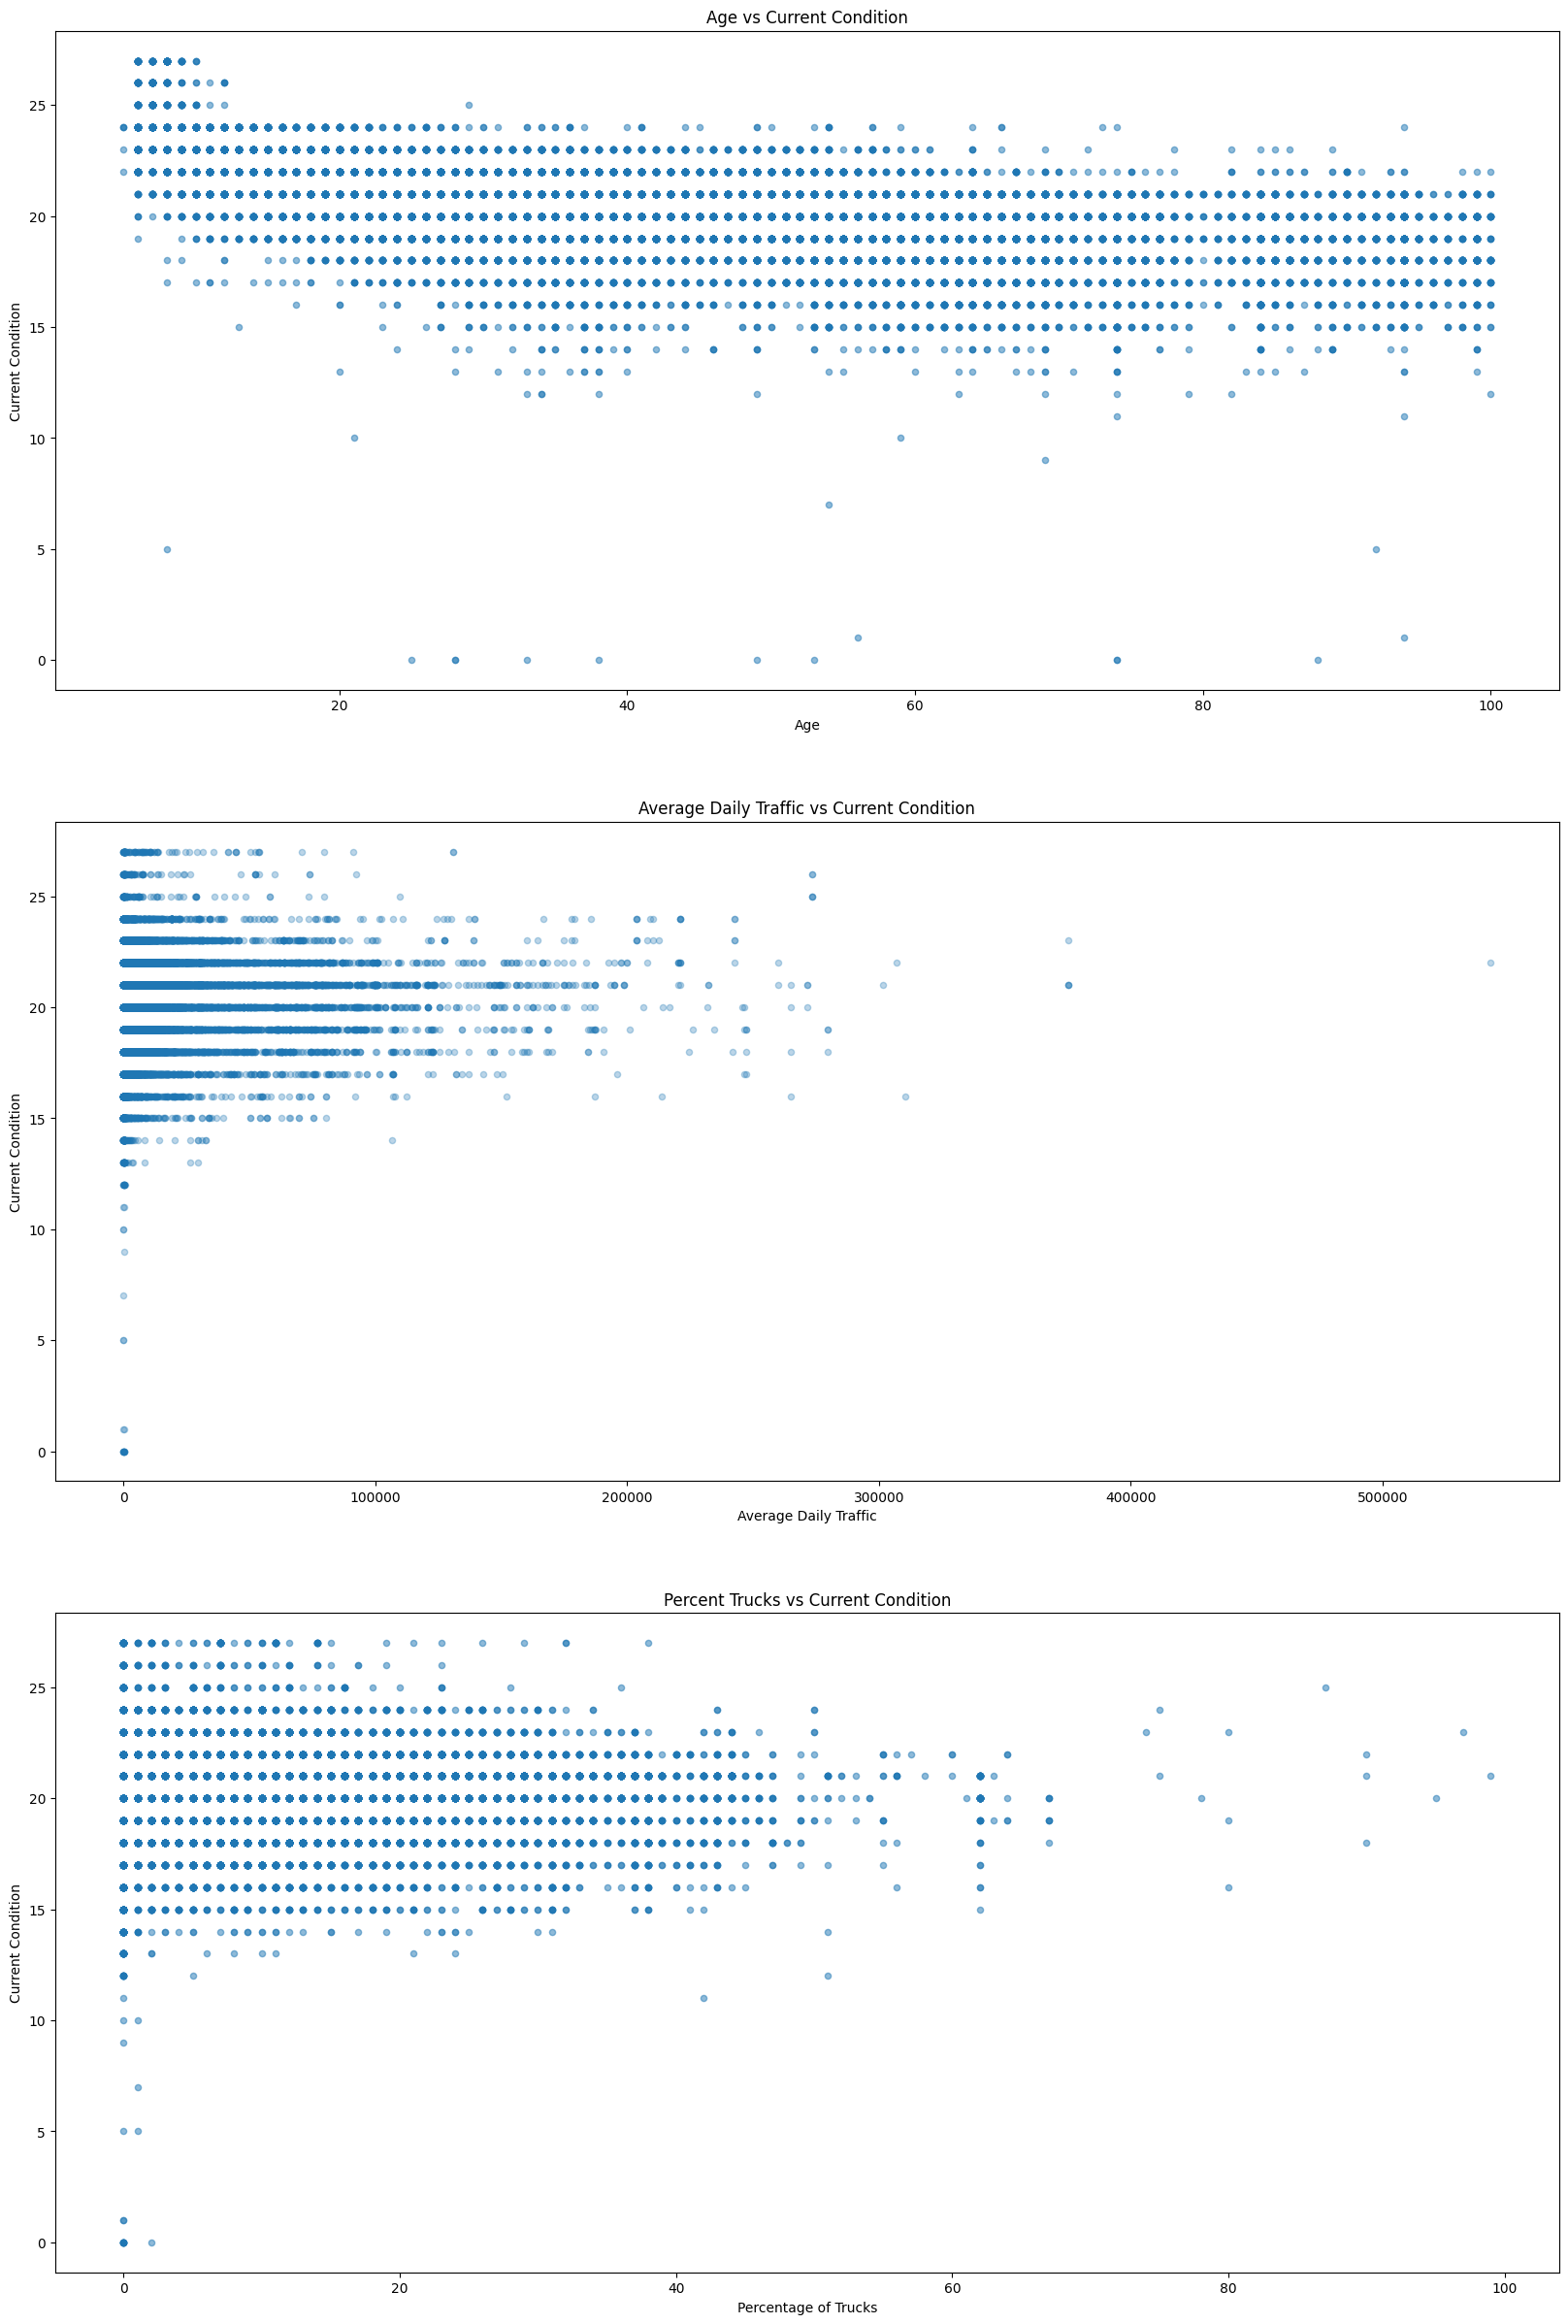

In [157]:

fig,((a1,a2,a3)) = plt.subplots(3, 1, figsize=(20, 30))

# Scatter Plot 1: Age vs Current Condition 
bridges_filtered_age.plot(kind='scatter', x='Age', y='Current_condition', alpha = 0.5, ax=a1)
a1.set_title('Age vs Current Condition')
a1.set_xlabel('Age')
a1.set_ylabel('Current Condition')

# Scatter Plot 2: Average Daily Traffic vs Current Condition 
bridges_filtered_age.plot(kind='scatter', x='AverageDaily', y='Current_condition', alpha = 0.3, ax=a2)
a2.set_title('Average Daily Traffic vs Current Condition')
a2.set_xlabel('Average Daily Traffic')
a2.set_ylabel('Current Condition')

# Scatter Plot 3: Percentage of Trucks vs Current Condition 
bridges_filtered_age.plot(kind='scatter', x='Trucks_percent', y='Current_condition', alpha= 0.5, ax=a3)
a3.set_title('Percent Trucks vs Current Condition')
a3.set_xlabel('Percentage of Trucks')
a3.set_ylabel('Current Condition')


                        Age  AverageDaily  Trucks_percent  Current_condition
Age                1.000000     -0.049153        0.238289          -0.588520
AverageDaily      -0.049153      1.000000        0.022357           0.032369
Trucks_percent     0.238289      0.022357        1.000000          -0.051177
Current_condition -0.588520      0.032369       -0.051177           1.000000


Text(0.5, 1.0, 'Correlation Matrix: Continuous Variables vs Target Variables')

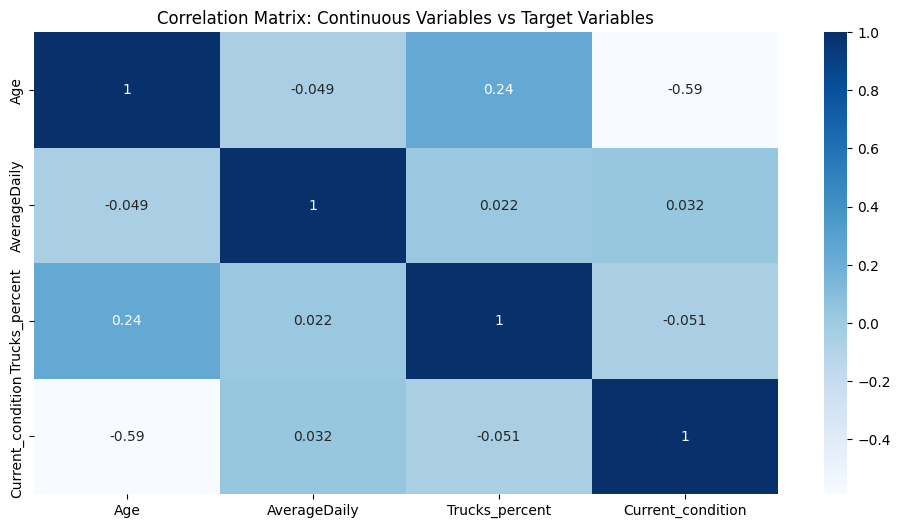

In [158]:
# Correlation matrix 
correlation_matrix = bridges_filtered_age[['Age', 'AverageDaily', 'Trucks_percent', 'Current_condition']].corr()
print(correlation_matrix)

# Heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap (correlation_matrix, cmap='Blues', annot=True)
plt.title("Correlation Matrix: Continuous Variables vs Target Variables")

**(b) Categorical Predictors vs. Target**
- Box plot is used to show the distribution of target variable (`Current_condition`) across two simplified categorical variables (`SimpMat`, `SimpDes`).

Text(0, 0.5, 'Current Condition')

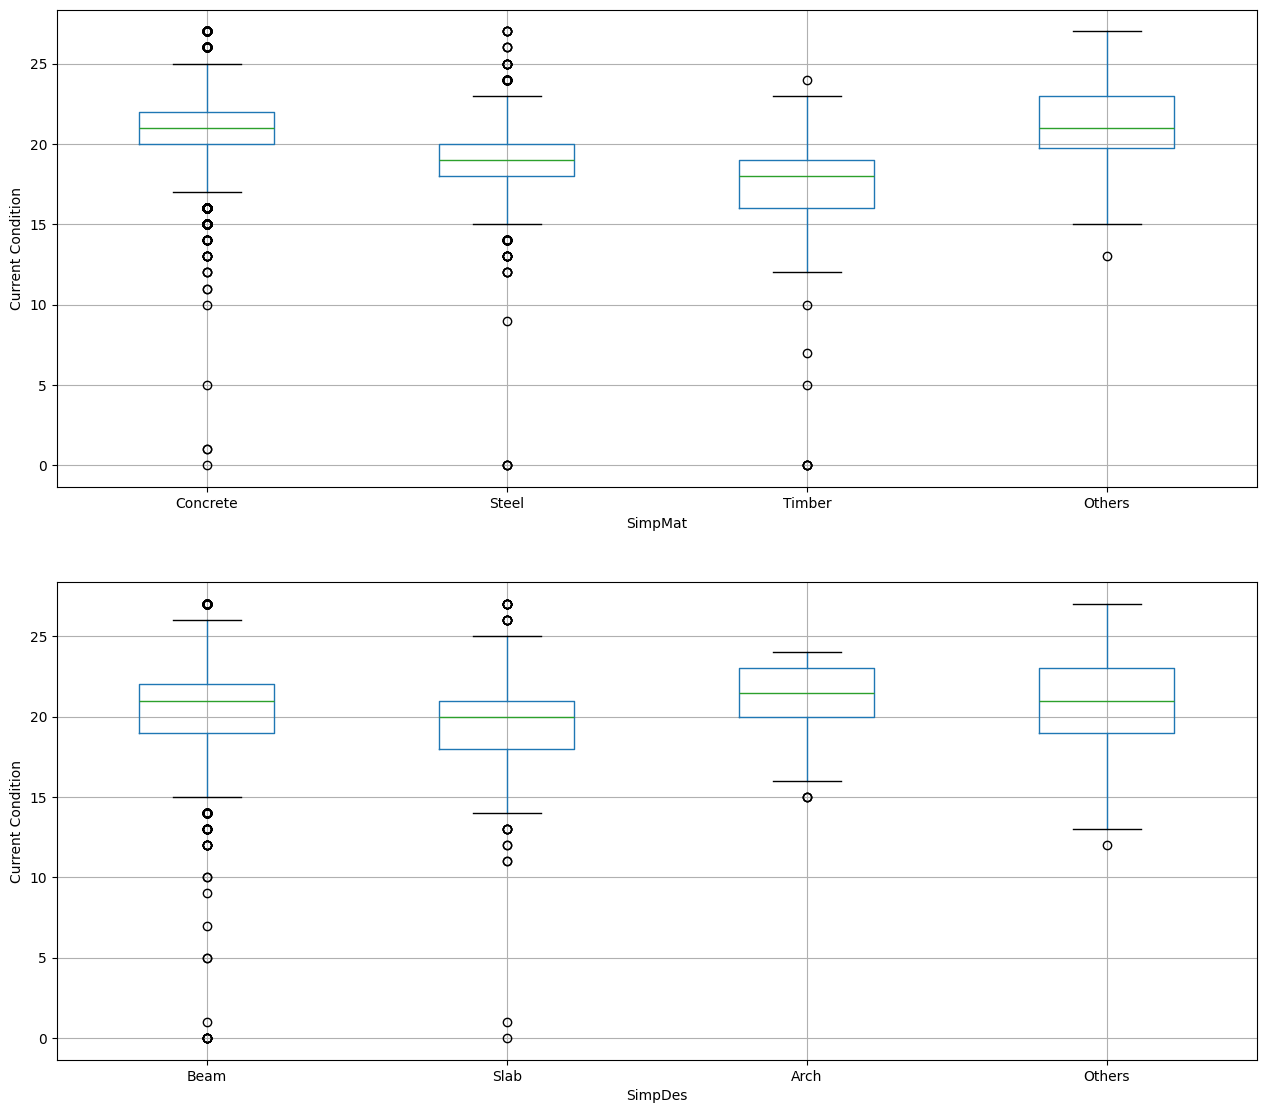

In [159]:
fig,(b1,b2) = plt.subplots(2,1, figsize=(15,14))

# Box plot 1: Material vs Current Condition
bridges_filtered_age.boxplot(column ='Current_condition', by='SimpMat', ax=b1)

# Box plot 2: Design vs Current Condition
bridges_filtered_age.boxplot(column='Current_condition', by='SimpDes', ax=b2)

fig.suptitle('')
[b.set_title('') for b in [b1,b2]]
b1.set_ylabel('Current Condition')
b2.set_ylabel('Current Condition')

#### **2.2.2 Relationship between Categorical Variables**
- A contingency table (cross-tabulation)  is used to find the relationship between two simplified categorical variables (`SimpMat` and `SimpDes`). The relationship is then visualised via heat map.

SimpDes    Beam  Slab  Arch  Others
SimpMat                            
Concrete  21560  4181    49     974
Steel      6048     0    51     301
Timber      464     0     0       0
Others        0     0    11      41


Text(0.5, 1.0, 'Simplified Material vs Simplified Design')

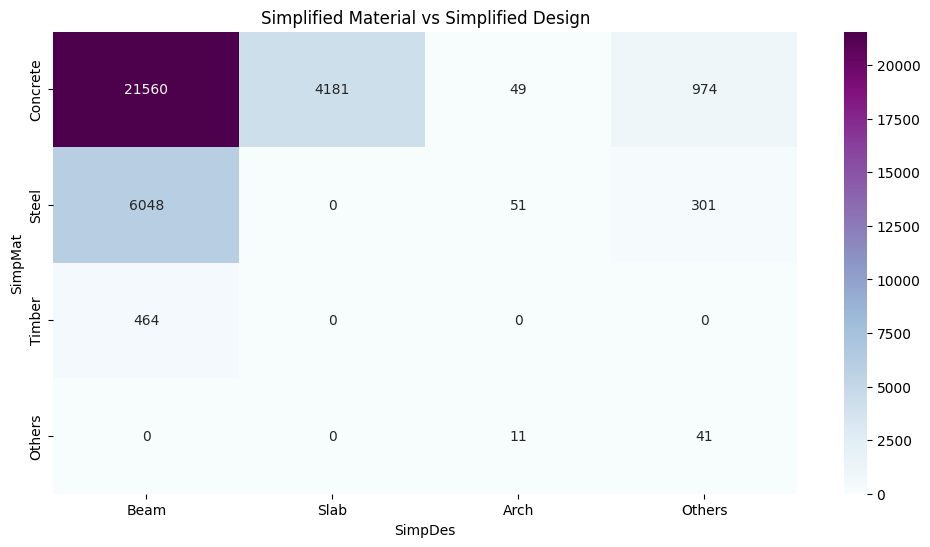

In [160]:
# Contigency Table
contingency_table = pd.crosstab(bridges_filtered_age['SimpMat'], bridges_filtered_age['SimpDes'])
print(contingency_table)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, cmap='BuPu', fmt='g')
plt.title('Simplified Material vs Simplified Design')


#### **2.2.3 Preliminary Analysis and Preliminary Conclusion**


After plotting the relationships between the predictors and the target variable, and the relationships between predictors, a preliminary analysis and preliminary conclusion is drawn to answer the following questions asked by the Texas Department of Transportation:

1. How well can the five predictor variables explain the variation in the current condition of bridges?
2. Which predictor variables have the greatest influence on the current condition of bridges?

**(a) Analysis on therelationship between five predictors and target variable**

**1. Age vs Current Condition:** 
- The scatter plot shows a negative linear relationship between age and the current condition of bridges, indicating that older bridges tend to be in worse condition. The correlation coefficient of -0.59, as shown in the correlation matrix, further indicates that this relationship is strong and negative correlated. 

**2. Average Daily Traffic vs Current Condition:**
- The scatter plot shows almost no linear relationship between average daily traffic and the current condition of bridges. The very weak positive correlation coefficient of 0.032 futher supports this, suggesting that average daily traffic is not a good variable for predicting the current condition of bridges, as the condition of bridges remains relatively stable across varying traffic levels.

**3. Percentage of Trucks vs Current Condition:** 
- Similar to average daily traffic, there is no significant linear relationship between the percentage of trucks and the current condition of bridges.The very weak negative correlation coefficient of -0.051, indicates that the percentage of trucks in the traffic is not a strong predictor of bridge condition as the bridges condition remains relatively stable across varying truck traffic.

**4. Material vs Current Condition:** 
- The box plot shows that bridges made of concrete and steel tend to have higher median scores, around 20, compared to timber, which has a median score below 20. Both concrete and steel show a narrow interquatile range, meaning the condition of most concrete and steel bridges is consistent and generally good. However, there are many outliers for concrete and steel, likely due to the large sample size (as shown in contigency table), meaning while most concrete and steel bridges are in good condition, some are in poor condition.
- Interestingly, bridges made from other materials have a median score of above 20. This may be due to the smaller number of bridges in this categoty, and possibly other influencing factors such as special designs or less frequent usage, contributing to their relatively better condition. 

**5. Design vs Current Condition:** 
- The box plot shows that bridges with beam design tend to have a median score of above 20, while slab designs has the lowest median score, below 20. Additionaly, arch and others deisgns have a median score of above 20 as well. This suggests that slab-designed bridges usually are in worse condition compared to other design. 

**6. Material vs Design** 
- The contigency table shows that concrete is the most frequently used material, followed by steel. Concrete bridges are predominantly used with beam design. Steel bridges are also commonly used with beam designs while timber bridges are exclusively designed with beam. In terms of design, beam is the most frequently used design, followed by slab. Beam design is not used with others materials, and slab designs are only used for concrete bridges. Arch deisgn is the least used design and span across various materials, including concrete, steel and others. 


**(b) Conclusion:** 

Among the five predictors, age is the best predictor and has the greatest influence on current condition of bridges, supported by the strong negative correlation of -0.59, indicating that older bridges are generally in worse condition. 

Materials and design could be a useful predictor of current condition of bridges. For example, bridges made of concrete and those with beam designs tend to in better condition, as shown by their higher median score of current condition while being the most frequently used materials and design in building bridges. 

Average daily traffic and percent trucks are poor variavbles in predicting bridge condition, as both showed very weak correlations with current conditions, suggesting that both daily traffic volume and truck percentage have a very small impact on the bridge conditions.


### 2.3 Regression Modelling 
- A linear regression is constructed to look at the effect of the five predictor variables on target variable.
- An interpretation on the regression model, final conclusion and future suggestions have also included.

#### **2.3.1 Linear Regression Model**

A linear regression model is plotted between five predictor variables (`Age`, `AverageDaily`, `Trucks_percent`, `SimpMat` and `SimpDes`) and target variable (`Current_condition`).


**(a) Preparation**

We look at the distribution of the three variables involved.

1. The theory of regression - in particular that the best regression line minimises the square of the errors - assumes that the dependent variable has a normal distribution. There is nothing to stop you constructing a regression when this is far from true but it may not work well. We see that the 'MaxRate' variable has a slight negative skew, but not too much.

2. There is no assumption that the predictor (independent) variables are normally distributed. Note however that a better fit may be achieved if variables are transformed. A high degree of skew may be an indication that some transformation would work better. Always try without first! Our proposed predictors do not have an alarming skew.

3. The predictor variables should not be co-linear. Check this on a scatter and / or look at the correlation coefficient. Again, it is possible to construct a regression with correlated predictors but it will probably not work very well and there is no **cut-off threshold** for the correlation co-efficient above which we can say *'stop - too correlated'*. Our predictors do not seem very correlated.

Text(0.5, 1.0, 'Trucks Percent Distribution')

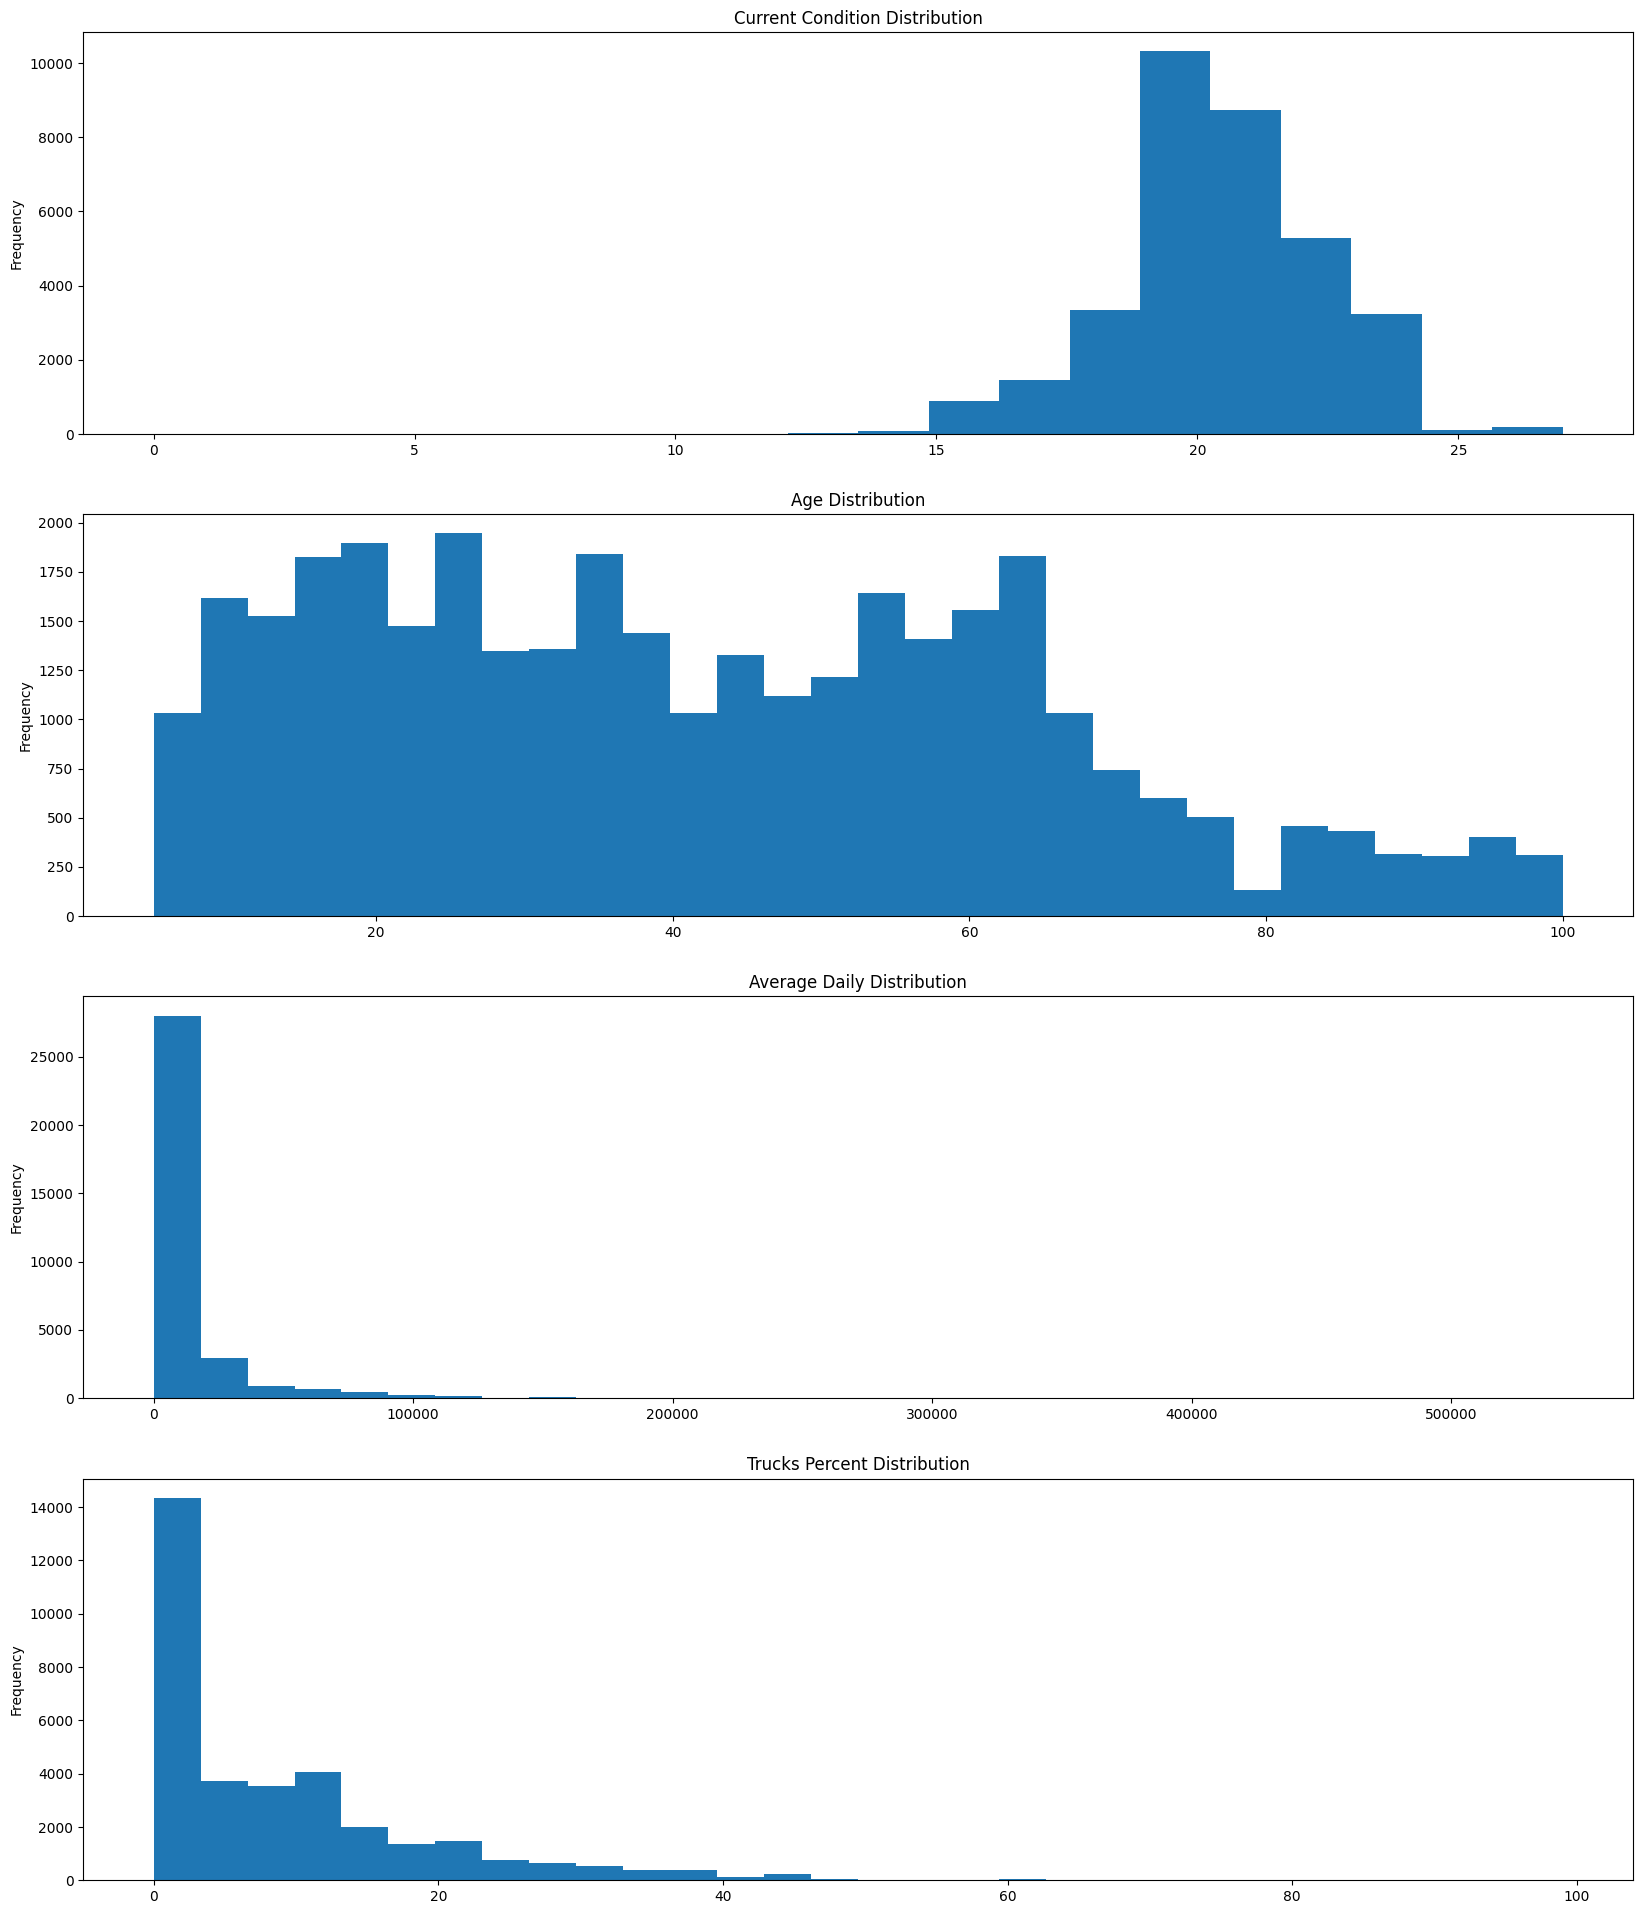

In [161]:
#Plot histogram 
fig,((c1,c2,c3,c4)) = plt.subplots(4, 1, figsize=(20, 24))

# Histogram 1: Distribution of Total Population 
bridges_filtered_age['Current_condition'].plot(kind='hist',bins=20, ax=c1)
c1.set_title('Current Condition Distribution')
# c1.set_xlabel('Total Population')
# c1.set_ylabel('Frequency')

#Histogram 2: Distribution of Younger Proportions
bridges_filtered_age['Age'].plot(kind='hist', bins=30, ax=c2)
c2.set_title('Age Distribution')
# c2.set_xlabel('Younger Proportion')
# c2.set_ylabel('Frequency')

#Histogram  3: Distribution of Older Proportion
bridges_filtered_age['AverageDaily'].plot(kind='hist', bins=30, ax=c3)
c3.set_title('Average Daily Distribution')
# c3.set_xlabel('Older Proportion')
# c3.set_ylabel('Frequency')

# Histogram for Estimated Median Age
bridges_filtered_age['Trucks_percent'].plot(kind='hist', bins=30, ax=c4)
c4.set_title('Trucks Percent Distribution')
# c4.set_xlabel('Median Age')
# c4.set_ylabel('Frequency')

#not normal and highly skewed,need transformation?

In [162]:
#checks for collinearity 
#refers to the correlation matrix in above and lok at the correlation coefficient 
correlation_matrix

#No collinearity 

,Age,AverageDaily,Trucks_percent,Current_condition
Age,1.000000,-0.049153,0.238289,-0.588520
AverageDaily,-0.049153,1.000000,0.022357,0.032369
Trucks_percent,0.238289,0.022357,1.000000,-0.051177
Current_condition,-0.588520,0.032369,-0.051177,1.000000


Key Findings:
Age vs Other Variables:

The correlation coefficient between Age and AverageDaily is very low (-0.049), indicating almost no relationship between these two variables.
The correlation between Age and Trucks_percent is 0.24, which indicates a weak positive relationship, but it's far from the threshold for collinearity.
The strongest correlation in the matrix is between Age and Current_condition (-0.59). While this is a significant negative relationship, it does not indicate collinearity, as collinearity refers to strong correlations between predictors, not between predictors and the target.
Average Daily Traffic vs Other Variables:

The correlation between AverageDaily and Trucks_percent is only 0.022, which is a very weak positive relationship, indicating no collinearity.
AverageDaily has almost no correlation with Current_condition (0.032), confirming that this variable does not heavily influence the target variable.
Trucks Percent vs Other Variables:

The correlation between Trucks_percent and AverageDaily is extremely weak (0.022), which again indicates no collinearity between these variables.
The correlation between Trucks_percent and Current_condition is -0.051, suggesting no significant relationship between these variables either.
Conclusion:
There are no signs of collinearity between the continuous predictor variables (Age, AverageDaily, Trucks_percent). The correlation values between the predictor variables are all well below the commonly accepted threshold for multicollinearity, which is typically around 0.7 or higher. Thus, you can proceed with building your regression model without concern for collinearity between the predictors.

In [168]:
from sklearn.linear_model import LinearRegression

# Combine all five variables and target in a new df 
simpBridges_df = pd.DataFrame({'Age': bridges_filtered_age['Age'],
                               'AverageDaily': bridges_filtered_age['AverageDaily'],
                               'Trucks_percent': bridges_filtered_age['Trucks_percent'],
                               'SimpMat': bridges_filtered_age['SimpMat'],
                               'SimpDes': bridges_filtered_age['SimpDes'],
                               'Current_condition': bridges_filtered_age['Current_condition']})

# Drop rows with NaN values
simpBridges_df = simpBridges_df.dropna()
simpBridges_df

,Age,AverageDaily,Trucks_percent,SimpMat,SimpDes,Current_condition
Structure_id,,,,,,
000021521-00101,19,1,0.0,Concrete,Slab,23.0
000021521-00181,19,1,0.0,Concrete,Slab,22.0
000021521-TMP20,12,100,0.0,Concrete,Beam,24.0
000021525-00012,74,80,0.0,Timber,Beam,18.0
000021580-00092,20,150,4.0,Concrete,Beam,23.0
...,...,...,...,...,...,...
DAPFORHOO000012,30,300,40.0,Concrete,Beam,21.0
DAPFORHOO000013,24,300,40.0,Concrete,Beam,21.0
DAPFORHOO000015,28,1200,25.0,Concrete,Beam,21.0


Continuous Variable vs Target Variable

In [171]:
##Continuos variables
# Define X and y variables 
X_continuous= np.column_stack((simpBridges_df['Age'], 
                               simpBridges_df['AverageDaily'], 
                               simpBridges_df['Trucks_percent']))
y = simpBridges_df['Current_condition']

# Fit 
reg = LinearRegression().fit(X_continuous, y)

# Print R² and Coefficients for Continuous Variables
print('The R² (coefficient of determination) is: %4.3f' % reg.score(X_continuous, y))
beta_Age, beta_AverageDaily, beta_Trucks_percent = reg.coef_
print('Regression Coefficient for Age: %4.2f (change in condition score)' % beta_Age)
print('Regression Coefficient for Average Daily Traffic: %4.2f (change in condition score)' % beta_AverageDaily)
print('Regression Coefficient for Trucks Percent: %4.2f (change in condition score)' % beta_Trucks_percent)

The R² (coefficient of determination) is: 0.355
Regression Coefficient for Age: -0.05 (change in condition score)
Regression Coefficient for Average Daily Traffic: 0.00 (change in condition score)
Regression Coefficient for Trucks Percent: 0.02 (change in condition score)


Coefficients of linear regression have different units for differnt variables and hence we need to make some modification when comparing them. Modifications done are : 

- Look at the range (0.10 to 0.90 quantile) of each predictor and target variable. 
- Calculate the change in the target values as a percentage of its range that would result from the changing each of the predictor variables over its range, which gives better comparision of the importance of the predictors.

In [166]:

# Find the range between 0.1 and 0.9 quantile for each predictor and the target variable
age_range = bridges_filtered_age['Age'].quantile(0.9) - bridges_filtered_age['Age'].quantile(0.1)
avgdaily_range = bridges_filtered_age['AverageDaily'].quantile(0.9) - bridges_filtered_age['AverageDaily'].quantile(0.1)
trucks_range = bridges_filtered_age['Trucks_percent'].quantile(0.9) - bridges_filtered_age['Trucks_percent'].quantile(0.1)
condition_range = bridges_filtered_age['Current_condition'].quantile(0.9) - bridges_filtered_age['Current_condition'].quantile(0.1)

# Print ranges for each variable
# print('Age range (10th to 90th percentile): %3.1f years' % age_range)
# print('Average Daily Traffic range (10th to 90th percentile): %3.0f vehicles' % avgdaily_range)
# print('Trucks Percent range (10th to 90th percentile): %3.1f %%' % trucks_range)
# print('Current Condition Score range (10th to 90th percentile): %3.1f score' % condition_range)

# Calculate and print the percentage change in Current Condition due to each predictor over its range
print('Change in Current Condition due to Age (as %% of condition range): %4.1f%%'
      % (100 * (beta_Age * age_range) / condition_range))
print('Change in Current Condition due to Average Daily Traffic (as %% of condition range): %4.1f%%'
      % (100 * (beta_AverageDaily * avgdaily_range) / condition_range))
print('Change in Current Condition due to Trucks Percent (as %% of condition range): %4.1f%%'
      % (100 * (beta_Trucks_percent * trucks_range) / condition_range))

Change in Current Condition due to Age (as % of condition range): -61.8%
Change in Current Condition due to Average Daily Traffic (as % of condition range):  0.0%
Change in Current Condition due to Trucks Percent (as % of condition range):  8.3%


Categorical Variables vs Target Variable

In [173]:

# Step 5: Fit the Model Including Categorical Variables (SimpMat, SimpDes)
# One-hot encode categorical variables (drop the first category)
mat_and_des_d = pd.get_dummies(simpBridges_df[['SimpMat', 'SimpDes']], drop_first=True)


# Update X variables 
X_combined = np.column_stack((simpBridges_df['Age'],
                              simpBridges_df['AverageDaily'],
                              simpBridges_df['Trucks_percent'],
                                mat_and_des_d['SimpMat_Steel'],
                                mat_and_des_d['SimpMat_Timber'],
                                mat_and_des_d['SimpMat_Others'],
                                mat_and_des_d['SimpDes_Slab'],
                                mat_and_des_d['SimpDes_Arch'], 
                                mat_and_des_d['SimpDes_Others']))


# Step 5: Fit the Regression Model with both Continuous and Categorical Variables
reg2 = LinearRegression().fit(X_combined, y)

# Step 6: Print R² and Coefficients for the full model
#np.set_printoptions(suppress=True, floatmode='maxprec')
print('The R² coefficient of determination is %4.3f' % reg2.score(X_combined, y))
print('The regression coefficients are:', reg2.coef_)

The R² coefficient of determination is 0.453
The regression coefficients are: [-0.04952112 -0.0000008   0.00539497 -1.37137985 -3.1955325  -0.12639707
 -0.07640081  1.05378138 -0.09727279]


Residuals

Text(0.5, 1.0, 'Actual vs Predicted Values')

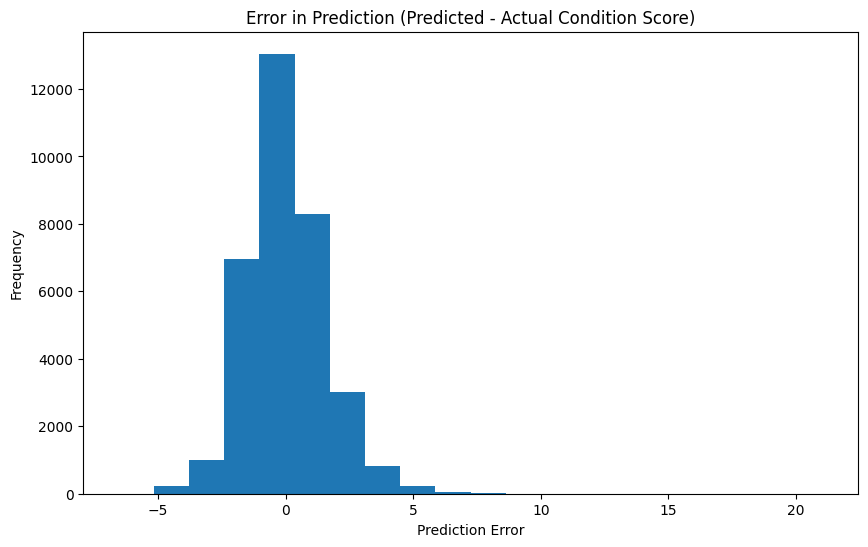

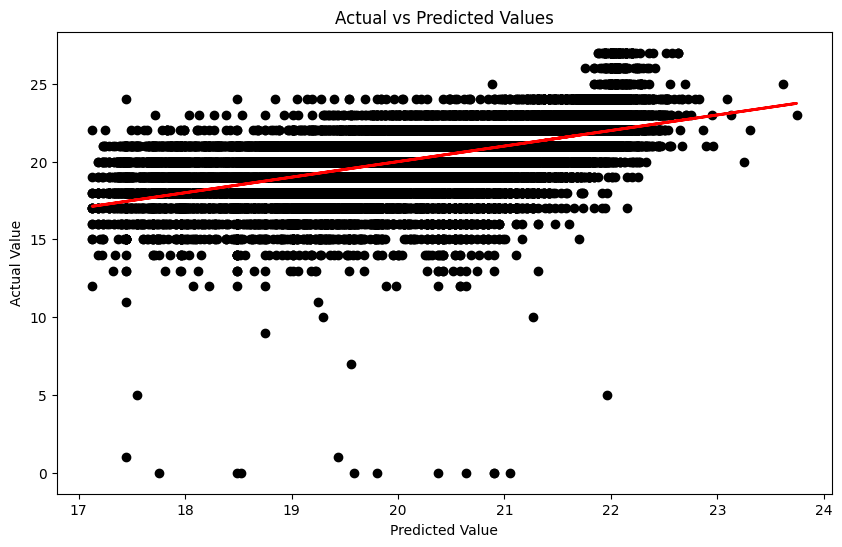

In [181]:
# Step 7: Predict and Analyze Residuals
# Predict values based on the model
y_hat = reg.predict(X_continuous)
residuals = y_hat - y

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.title('Error in Prediction (Predicted - Actual Condition Score)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

# Step 8: Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_hat, y, color='black')
plt.plot(y_hat, y_hat, color='red', linewidth=2)  # Best fit line
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Actual vs Predicted Values')


1. R² (Coefficient of Determination):

- In the first regression model (with only continous variables), the R2 value is 0.355, suggesting that around 35.5% of the varaince in the bridge condition score is explained by the predictors (age, average daily traffic and percentage of trucks). 

- In the second regression model (with both continuous and categorical variables), the R2 value increases to 0.453, indicating that 45.3% of the variacnce in the target variable (current condition) is now explained by all five predictors (age, average daily traffic, trucks percentage, simplified material and simplified design). This means that the inclusion of the categorical variables (`SimpMat` and `SimpDes`) has improved the model's explanatory power by around 10%, suggesting that material type and design used has an influence on the brigdes condition. 

2. Comparison of influence of different predictors based on regression coefficient :

(a) Comparision of regression coefficients over variable ranges (continuous predictors)
- Age: When comparing bridges across its age range (from 10th to 90th percentile), the bridge condition score drops by 61.8% over that range. This indicates that older bridges are generally in much worse condition.

- Average Daily Traffic - The influence of average daily traffic on the bridge condition is practically zero, as shown by the 0.0% change in condition. 

- Trucks percent: The percentage of trucks in the traffic has a small but noticaeble influence on the bridge condition. Interestingly, when comparing trucks percentage across its range (from 10th to 90th percentile), the bridge condition score increases about 8.3% over that range. This indicates that bridges that handle more truck traffic are in slightly better condition, compared to those handle fewer trucks traffic.

(b) Comparision of regression coefficients (both continuous and categorical)
- After adding the categorical variables, the changes for regression coefficient of the continuous variables (age and average daily traffic) is very small, and could be said no change. However, the regression coefficient for the other continuous variable (trucks percentage) changes from 0.02 to 0.05. This suggest that the inclusion of categorical variables changes the relationship between trucks percentage and bridge condition, indicating that Trucks Percent is slightly more predictive of the bridge conditions when material and design is considered, suggesting that trucks percentage interacts with material and design in a way that influences bridge conditions more than initially estimated. 

- After adding categorical variables, new regression coefficients appear for the categorical variables, indicating that both variables significantly influence the bridge condition. In terms of material, steel, timber and other materials have negative coefficients (-1.37, -3.19, -0.13), suggesting these materials generally perform worse compared to the baseline material (concrete). Timber bridges have much more negative impact with condition scores 3.19 points lower than concrete, indicating that timber performs the worst in terms of materials.

- In terms of design, slabs and other design with negative correlation (-0.08, -0.09) perform worse, while arches with a condition score 1.05 points perform better compared to the baseline design (beam). 


3. Distribution of residuals (errors)
- The histogram shows an approximately normal distribution of the residuals, with a mean around 0. The spread of the residuals is relatively narrow, with most of the errors falls between a range of -5 to +5, indicating the model underestimated or overestimated the actual condition score respectively. These suggest that the linear regression model is performing reasonably well and accurate. 


4. Conclusion 
- Age has the greatest influence on the current condition of bridges with the largest percentage change of -61.8% compared to the changes caused by other factors. This suggests that older bridges tend to be in worse condition. Material and design also play an important role that influence the bridge condition. From the analysis above, bridges built with concrete and designed with arches tend to be in a better condition compared to those made from other material and designs, such as timber and slab. Trucks percent show minimal influence on the bridges condition, and the influence increases slighlty when considering the materials and design used to build bridges, while average daily traffic shows very very minimal influence on the bridges condition. 

5. Suggestions
- Future analysis could explore potential non-linear relationships between the predictors and target as only linear relationship is analysed using correlation in this dataset. Besides that, future analysis could include additional predictors like climate condition, usage frequency, maintainence history and others. In addition, more advanced model could be used to capture the complex patterns and offer better predictive accuaracy in the data as linear regression is relatively simple. 